# Nanodegree Engenheiro de Machine Learning
## Unsupervised Learning
## Project 3: Creating Customer Segments

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [58]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from random import randint
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
data.head(3)

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


## Observando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'**. Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [59]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

Chosen samples of wholesale customers dataset:
Selected indices: 0:53 1:186 2:436


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,491,10473,11532,744,5611,224
1,3009,521,854,3470,949,727
2,39228,1431,764,4510,93,2346


Mapa de procentagem %


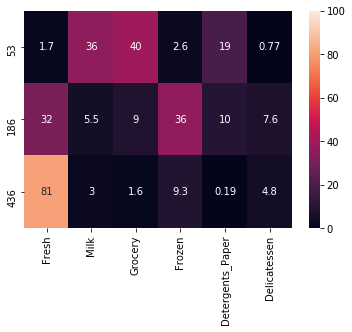

In [60]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
client_0 = 53 #randint(0, len(data.index)/3)
client_1 = 186 #randint(len(data.index)/3, len(data.index)/2)
client_2 = 436 #randint(len(data.index)/2, len(data.index))
indices = [client_0, client_1, client_2]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
print "Selected indices: 0:" + str(client_0) +" 1:" + str(client_1) +" 2:" + str(client_2)
display(samples)

print "Mapa de procentagem %"
percentual = data.copy()
percentual = percentual.iloc[indices]
for ind in indices:
    percentual.loc[ind] = percentual.loc[ind] * 100 / np.sum(percentual.loc[ind])

sns.heatmap(percentual, vmin=0, vmax=100, annot=True)

### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
*Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?*  
**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**

**Entendimento de cada categoria:**

Fresh: Frutas, verduras, legumes, etc.<br/>
Milk: Leite em geral.<br/>
Grocery: Biscoitos, doces, bolos, empacotados em geral.<br/>
Frozen: Carnes, e outros produtos congelados.<br/>
Detergents_Paper: Guardanapos de papel, produtos de higiene em geral.<br/>
Delicatessen: Presunto, Queijos, embutidos em geral.<br/>


*Cliente 0:* Este cliente se parece com uma loja de conveniências, ou um mini mercado, devido a alta demanda de leite e biscoitos/bolos em geral, e produtos de limpeza. Estes três tipos de produtos juntos somam cerca de 95% das despesas do cliente. O que demonstra que ele possui um foco bem específico de revenda.

*Cliente 1:* Este cliente se parece com um restaurante convencional, com uma boa demanda de legumes e congelados, a distribuição dos produtos é bem uniforme, sendo um pouco mais baixa apenas em leite, note que como detergents_paper é responsável por 10% das despesas podemos confirmar que existe uma rotatividade grande de público neste cliente, o que confirma que realmente pode ser um restaurante.<br/>

*Cliente 2:* Este cliente se parece muito com o anterior, um restaurante, porém com um gastos bem maiores, que seguem no geral quase a mesma proporção, e mais focado em produtos da categoria fresh. Porém, este cliente também pode ser um grande revendedor focado em apenas horti-fruti e congelados.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [61]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeRegressor

def find_target_score(dropped_feature, data):
    # TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
    new_data = data.drop(dropped_feature, axis=1)
    target = data[dropped_feature]
    
    # TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
    print "Atributo Removido: {}".format(dropped_feature)
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=30)
    
    # TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
    regressor = DecisionTreeRegressor(random_state=30)
    regressor.fit(X_train,y_train)
    # TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
    score = regressor.score(X_test,y_test)    
    print regressor.feature_importances_
    print "Score: " + str(score) + "\n"


features = list(data.columns)
print "Atributos:\n{}\n".format(features)

for i in range(len(data.columns)):
    find_target_score(data.columns[i], data)

Atributos:
['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

Atributo Removido: Fresh
[ 0.26771888  0.20874514  0.23210343  0.10949559  0.18193696]
Score: -0.0307317163901

Atributo Removido: Milk
[ 0.15695204  0.27250988  0.0318786   0.44936645  0.08929302]
Score: 0.488020874412

Atributo Removido: Grocery
[ 0.02091144  0.06083318  0.01998352  0.88197428  0.01629757]
Score: 0.479016912373

Atributo Removido: Frozen
[ 0.13189663  0.07030171  0.26397787  0.15486142  0.37896236]
Score: -2.0141547342

Atributo Removido: Detergents_Paper
[ 0.00653623  0.02203102  0.91921842  0.02143633  0.030778  ]
Score: 0.696504650239

Atributo Removido: Delicatessen
[ 0.12604769  0.24688091  0.25316671  0.31468554  0.05921915]
Score: 0.134663679936



### Questão 2
*Qual atributo você tentou prever? Qual foi a pontuação da previsão reportada? Esse atributo é necessário para identificar os hábitos de compra dos clientes?*  
**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados.

**Resposta:**

Inicialmente eu exibi todos para ter uma visão geral antes de escolher aleatoriamente um para explicar.
Detergents_Paper com score de 0,69 se mostrou o atributo menos necessário para prever os hábitos do cliente por estar altamente relacionado com os outros atributos, sendo mais influenciado pelo atributo Grocery. E vice versa, Grocery também registrou um score alto. Já os demais atributos com score baixos ou negativos, se mostraram importantes pois não se relacionam bem com os outros atributos.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

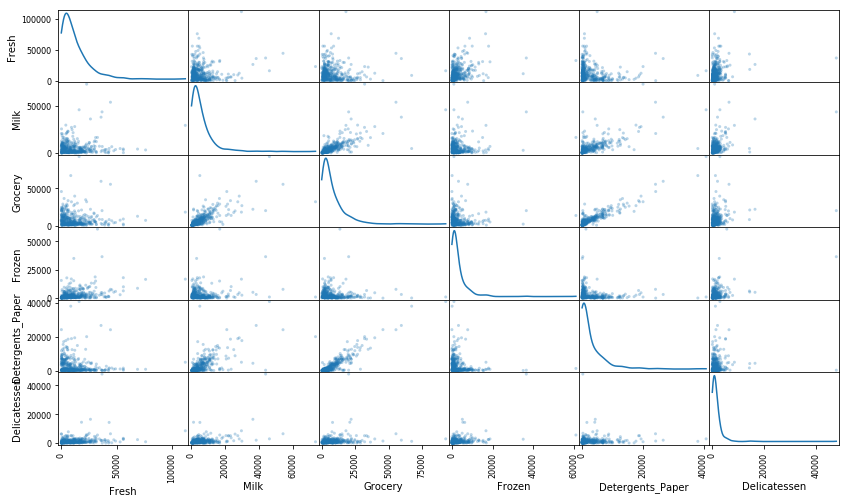

In [62]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

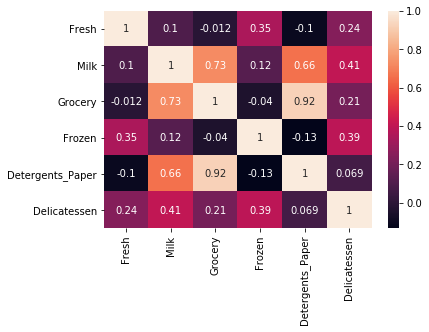

In [63]:
sns.heatmap(data.corr(), annot=True)

### Questão 3
*Há algum par de atributos que mostra algum grau de correlação? Isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever? Como os dados desses atributos são distribuídos?*  
**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos de dados está? 

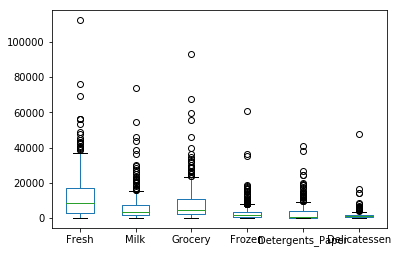

In [64]:
data.plot.box()

<img src="https://i.stack.imgur.com/ZN8N6.png">

**Resposta:**

Segundo o heatmap de score de correlação e a matriz de dispersão:

*Grocery e Detergents_Paper:* Com uma correlação de 0,92, e a maioria dos pontos dispostos em uma linha reta, como previsto pelo regressor.

*Grocery e Milk:* Com uma correlação de 0,73, Tendendo a formar uma linha reta.

Porém, no geral, os dados não estão normalmente destribuídos. Estão posicionados fora da média, como é possível ver através do boxplot, embora a visualização do boxplot não seja muito amigável, conforme imagem acima, notamos que a linha média está decentralizada, indicando que não estão normalmente distribuídos.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

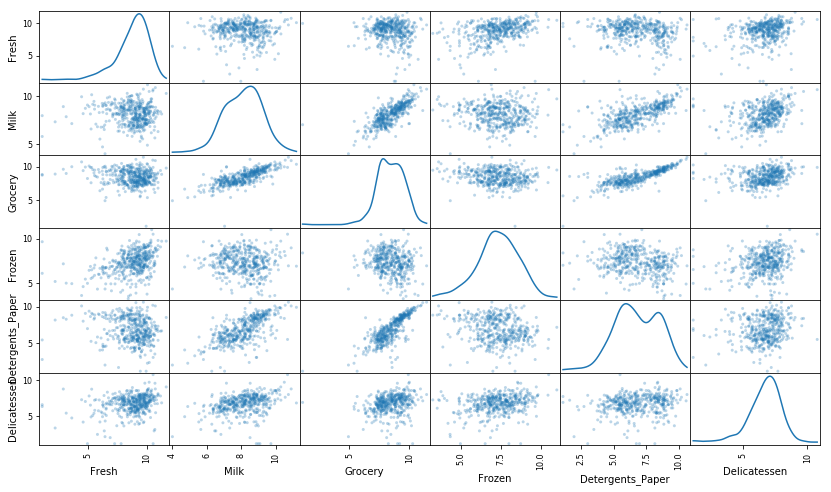

In [65]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = data.apply(np.log)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = samples.apply(np.log)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [66]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.196444,9.256556,9.352881,6.612041,8.632484,5.411646
1,8.009363,6.255750,6.749931,8.151910,6.855409,6.588926
2,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467


### Implementação: Detecção de Discrepantes
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!Once you have performed this implementation, the dataset will be stored in the variable .

In [67]:
#outiler cases será usado para medir se um dado é discrepante em mais de um atributo
outlier_cases = log_data.copy()
outlier_cases.loc[outlier_cases.index.values] = 0

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = (Q3 - Q1) * 1.5
    
    # Mostre os discrepantes
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    for outlier in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        outlier_cases.loc[[outlier], feature] = 1
          
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers  = []
for index, row in outlier_cases.iterrows():
    if np.sum(row) > 1:
        outliers.append(index)

# Remova os discrepantes, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [68]:
print 'Pontos discrepantes em mais de um atributo:'
display(outlier_cases.iloc[outliers])

Pontos discrepantes em mais de um atributo:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,1.0,0.0,0.0,1.0,0.0,0.0
66,1.0,0.0,0.0,0.0,0.0,1.0
75,0.0,0.0,1.0,0.0,1.0,0.0
128,1.0,0.0,0.0,0.0,0.0,1.0
154,0.0,1.0,1.0,0.0,0.0,1.0


### Questão 4
*Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima? Esses pontos de dados deveriam ser removidos do conjunto? Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.* 

**Resposta:**

Sim, na tabela acima foi exibido os pontos discrepantes em mais de um atributo. Onde 1 indica que ocorreu discrepância e 0 que não. Como a clusterização agrupa os pontos em conjuntos baseados em sua "posição no mapa", seria interessante remover todos os pontos que fogem demais da média, pois podem prejudicar o agrupamento dos pontos. Este 5 pontos foram adicionados a lista por serem considerados discrepantes em mais de um atributo e removidos do dataset pelo mesmo motivo, pois assim tentamos manter a qualidade do conjunto de dados.

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


Primeiros dois componentes 0.706817230807
Primeiros quatro componentes 0.931090109951


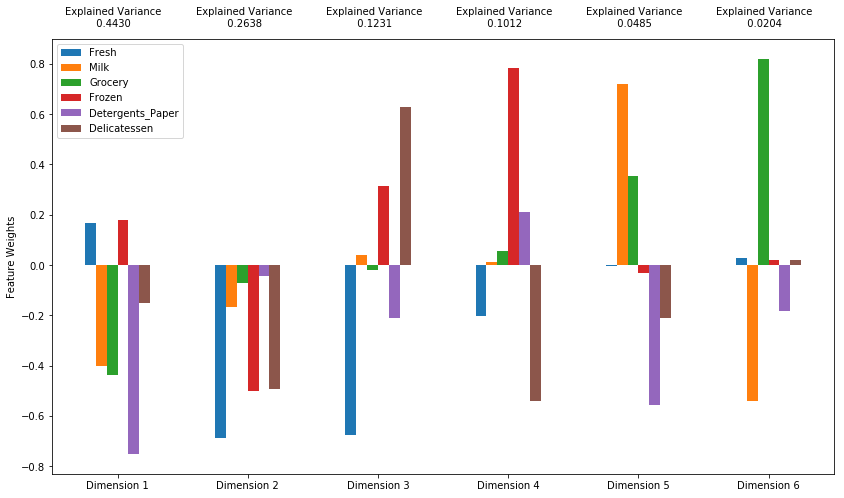

In [69]:
from sklearn.decomposition import PCA
# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = rs.pca_results(good_data, pca)
display(pca_results)

explained_var=pca.explained_variance_ratio_

print "Primeiros dois componentes " + str(np.sum([explained_var[0], explained_var[1]]))
print "Primeiros quatro componentes " + str(np.sum([explained_var[0], explained_var[1], explained_var[2], explained_var[3]]))

### Questão 5
*Quanta variância nos dados é explicado * ***no total*** * pelo primeiro e segundo principal componente? E os quatro primeiros principais componentes? Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões melhor representa em termos de despesas dos clientes.*  
**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**

Primeiros dois componentes 0.706817230807<br/>
Primeiros quatro componentes 0.931090109951<br/>

O primeiro e o segundo componentes principais explicam 0.709 da variância dos dados, enquanto os primeiros quatro componentes principais explicam 0.931 da variância dos dados.

Os valores de cada dimensão são baseados em encontrar quais features estão correlacionadas com seu valor, são elas as que possuirem maior magnitude, ou estiverem mais distantes do zero, seja positiva ou negativamente. Portanto:

Dimensão 1: Está fortemente correlacionada com milk, groceries, detergents, portanto quanto maior o gasto com essas features, maior será o valor da dimensão. Como notamos, o gráfico sugere que as variáveis milk e grocery variam juntas, o mesmo acontece em uma rápida olhada nas outras dimensões. Esta dimensão é boa para categorizar mercados e revendedores.

Dimensão 2: Nesta dimensão, quanto maiores gastos com frozen, fresh e delicatessen, maior o valor da dimensão, que ajuda a categorizar um cliente como restaurante/etc, que serve refeição sem um foco específico.

Dimensão 3: O valor significante em fresh, seguido de frozen e delicatessen e quase nenhum gasto com milk e grocery sugere que esta dimensão é boa para categorizar restaurantes mais focados em comida saudável.

Dimensão 4: Maiores gastos com frozen e delicatessen, e quase nenhum gasto com milk e grocery sugere um tipo de cliente focado em carne animal e derivados, como um açougue ou churrascaria.

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [70]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.5869,2.4239,0.3501,1.1095,0.4039,-0.3263
1,1.4951,0.5892,0.6535,0.7543,-1.9895,-0.4093
2,3.1848,-1.9448,0.2677,-0.6799,-0.2663,-0.5194


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [71]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [72]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.5869,2.4239
1,1.4951,0.5892
2,3.1848,-1.9448


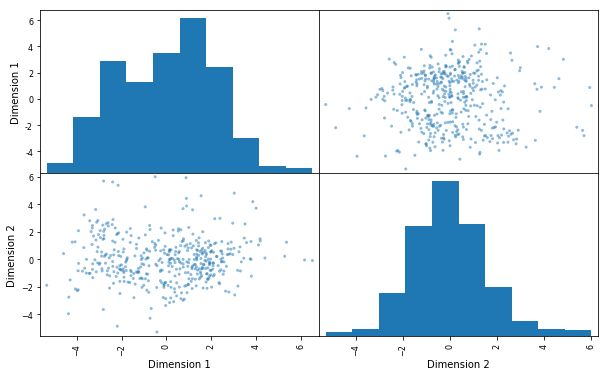

In [73]:
pd.plotting.scatter_matrix(reduced_data, figsize = (10,6));

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
*Quais são as vantagens de utilizar o algoritmo de clustering K-Means? Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano? Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.*

**Resposta:**

*Vantagens K-Means:*<br/>
    Simples de implementar, precisa definir apenas o número de clusters;<br/>
    Fácil de compreender visualmente;<br/>
    Rápido e Escalável.<br/>
    
*Vantagens Modelo de Mistura Gaussiano:*<br/>
    Mais flexível que o K-Means;<br/>
    Possibilita que alguns pontos possam pertencer a mais de um cluster;<br/>
    
Como pelo mapa eu estou considerando mais difícil visualizar as divisões, eu optei por usar um modelo mais flexível, e que pudesse permitir que um ponto pertencesse a mais de um grupo. Pois alguns clientes podem ser complicados de fixar em apenas um cluster, como por exemplo, imagine um minimercado que vende algumas porções de refeição. Portando a escolha foi o Modelo de Mistura Gaussiano.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [74]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = [2, 3, 4, 5, 6]
scores = []
score = 0

for n_cluster in clusters:
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = GaussianMixture(n_components = n_cluster, random_state = randint(0,100))
    clusterer.fit(reduced_data)
    
    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.means_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    current_score = silhouette_score(reduced_data,preds)    
    scores.append(current_score)


for index in range(len(clusters)):
    print 'Numero de cluster: ' + str(clusters[index]) + ' score: ' + str(scores[index])

# refazendo com o melhor Score
clusterer = GaussianMixture(n_components = 2, random_state = randint(0,100))
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = scores[0]
print '\nMelhor Score: ' + str(score)

Numero de cluster: 2 score: 0.421916846463
Numero de cluster: 3 score: 0.366083165806
Numero de cluster: 4 score: 0.297020767313
Numero de cluster: 5 score: 0.195071200694
Numero de cluster: 6 score: 0.254180293562

Melhor Score: 0.421916846463


### Questão 7
*Reporte o coeficiente de silhueta para vários números de cluster que você tentou. Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?* 

**Resposta:**

Foi criado uma iteração para testar com a seguinte quantidade de clusters:<br/>
Numero de cluster: 2, score: 0.421916846463<br/>
Numero de cluster: 3, score: 0.318206831874<br/>
Numero de cluster: 4, score: 0.344885959905<br/>
Numero de cluster: 5, score: 0.198073024609<br/>
Numero de cluster: 6, score: 0.326139450471<br/>

A melhor pontuação de silhueta está com o modelo de 2 clusters.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

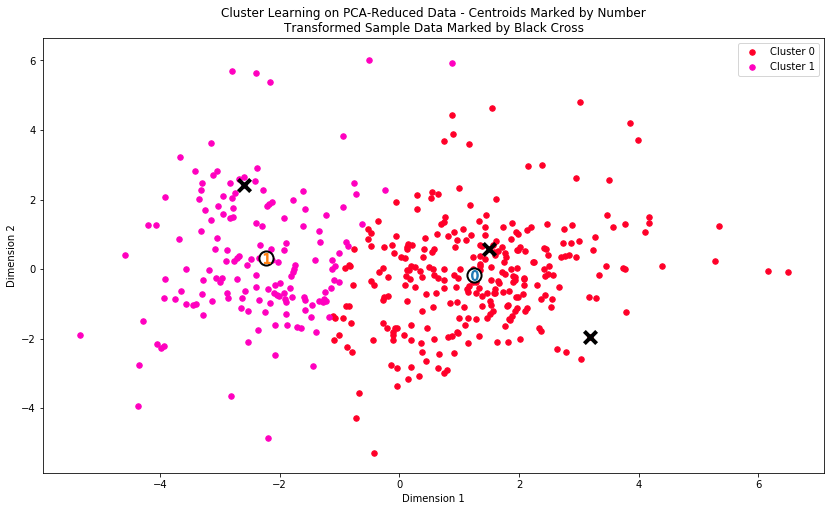

In [75]:
# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [78]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Questão 8
Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?*  
**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`.

**Resposta:**

O Segmento 1 se parece com o cliente 0 do exercício 1, representando os pequenos mercados, lojas de conveniência, ou quaisquer clientes focados em revenda de produtos.

Já o segmento 0, que se parece com o cliente 1 e 2 do exercício 1, representa bares, restaurantes ou cafés, que costumam preparar produtos frescos e congelados para venda.

### Questão 9
*Para cada amostra de ponto, qual segmento de cliente da* ***Questão 8*** *é melhor representado? As previsões para cada amostra de ponto são consistentes com isso?*

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [77]:
# Mostre as previsões
display(samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,491,10473,11532,744,5611,224
1,3009,521,854,3470,949,727
2,39228,1431,764,4510,93,2346


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Resposta:**

O cliente 0 realmente bateu com a previsão do cluster 1 (Segmento 1), onde classificamos o grupo como pequenos varejistas, lojas de conveniência ou mini-mercados. Até a proporção dos atributos estão bem alinhadas.

O cliente 1 e 2 também ficaram bem condizentes com o cluster 0 (Segmento 0), haviamos previsto que se caracterizavam como restaurantes e o algoritmo os previu no mesmo grupo, o ponto em questão que me ocasionou muita dúvida foi o atributo detergents_paper, que fulutou bastante entre as duas amostras, deve representar alguma peculiaridade de cada cliente, mas não o objetivo geral do estabelecimento, que é preparar os alimentos antes de vender.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente. *Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?*  
**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

As mudanças podem afetar os clientes de forma diferente, principalmente aos grandes compradores de produtos frescos ou congelados, por questões de perecividade ou armazenamento.

Podemos separar os segmentos de cliente e aplicar a mudança em cada segmento separadamente.

Para cada segmento selecionar um pequeno grupo de pontos para aplicar a mudança, evitando aplicar a mudança no segmento todo. Neste pequeno grupo de cada segmento podemos criar um índice X relevante, como por exemplo, baseado no total de gastos, ou gastos por tipo de produto, e comparar se há uma melhora ou piora no índice X após alterar o serviço de entrega para 3 dias.
Caso o resultado seja positivo, podemos aplicar a alteração para todo o segmento. Após isso, podemos fazer o teste no segmento restante.

No final podemos comparar os índices dos dois segmentos e verificar quais são mais afetados.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
*Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de* ***segmentação de clientes*** *  
**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

O distribuidor pode usar um algortimo de aprendizagem supervisionada com os dados anteriores e usando os segmentos de cluster como variável alvo. Assim pode prever facilmente onde novos clientes se encaixariam.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

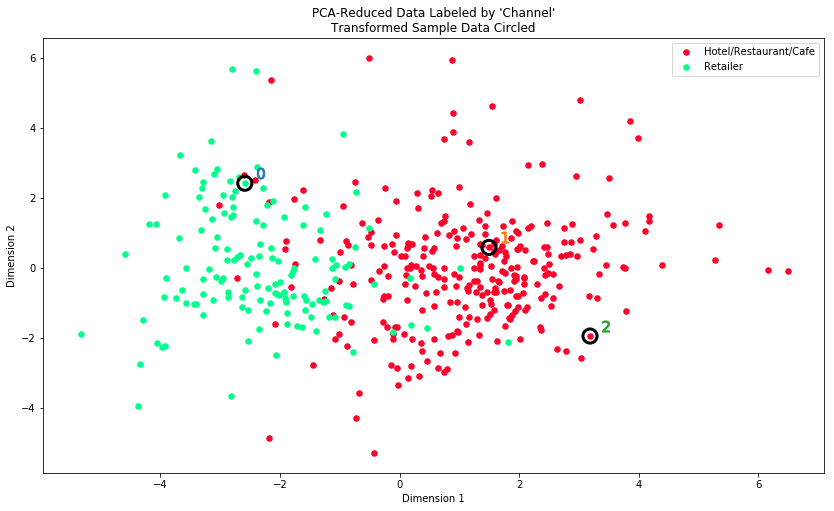

In [109]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
rs.channel_results(reduced_data, outliers, pca_samples)

### Questão 12
*Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista? Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição? Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

O algoritmo de cluster aparenta não ser tão bom para a segmentação em 2 clusters, apesar de que com 2 clusters tenhamos obtido o melhor score. Talvez as variáveis possam ser melhores separadas para tentar dividir melhor os clientes em segmentos mais específicos. Nessa distribuição é diíficil dizer que um cliente é exatamente aquele segmento, como por exemplo eu tive muitas dúvidas de como classificar o cliente 2 do exercício 1 com a quantidade de dados em mãos. 

Logo estas classificações não são consistentes, mas são um começo para como pensar melhores maneiras de segmentar os clientes, acho que construindo essa análise ajudou a identificar como é importante repensar os dados coletados para classificar corretamente os segmentos.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.